## Assignment 4
#### Gelana Tostaeva

In [1]:
#Loading necessary libraries
import numpy as np
import scipy.stats as stats
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set()

In [2]:
#Getting the data from the table in the notebook provided
controls = [15,18,10,39,29,10]
successes = [9,11,4,21,12,0]

For my test statistic, I chose the minimum success rate which I define to be the number of control successes per study divided by the total number of controls in the study. This test statistic ensures that the non-hierarchical model will not be able to yield the outlier success rate in the last study of $\frac{0}{10}$ when passed to the Binomial likelihood of the given model.

In [3]:
#Creating a test statistic function based on the minimum success rate
def test_stat(data):
    success_rates = [data[i]/controls[i] for i in range(len(controls))]
    return min(success_rates)
real_stat = test_stat(successes)

Based on the model description given, the posterior for the control group is given by the Beta distribution with $\alpha=58$ and $\beta=65$ parameters. The likelihood is a Binomial where $s$ is the probability of successes for the control group given our sampling from the Beta distribution.

In [4]:
#Drawing posterior samples from the beta distribution with the given parameters
posterior_samples = stats.beta.rvs(a=58,b=65,size=1000)

#Using the samples drawn to create replicated data
replicated = np.array([[stats.binom.rvs(n, s) for n in controls] for s in posterior_samples])

#Getting the test statistics for the replicated data
test_stats = []
for i in range(len(replicated)):
    test_stats.append((test_stat(replicated[i])))

Finally, to check the given model, we should see how unusual the real test statistic is compared to the test statistic distribution of the replicated samples. We verify this by computing the "p-value"; we get a value of 0.997 which means that the given model is a bad fit and suggests that the real control data are extremely atypical. This confirms that the non-hierarhical model does not explain the control group data well. 

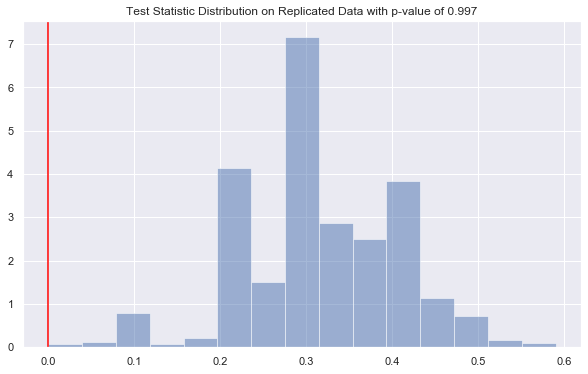

In [5]:
#Plotting the distribution of the test statistic values on the replicated data indicating
#the p-value for the model and test statistic on the real data

plt.figure(figsize=(10, 6))
plt.hist(test_stats, alpha=0.5, bins=15, density=True)
plt.title('Test Statistic Distribution on Replicated Data with p-value of %.3f' % (
    np.mean(np.array(test_stats) > real_stat)))
plt.axvline(test_stat(successes), color='red')